In [147]:
#Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from csv

    ID: Unique identifier for each patient.
    age: Age of the patient in days.
    age_years: Age of the patient in years (derived from age).
    gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
    height: Height of the patient in centimeters.
    weight: Weight of the patient in kilograms.
    ap_hi: Systolic blood pressure.
    ap_lo: Diastolic blood pressure.
    cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
    gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
    smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
    alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
    active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).
    cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
    bmi: Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).
    bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
    bp_category_encoded: Encoded form of bp_category for machine learning purposes.

In [148]:
data = pd.read_csv("cardio_data_processed.csv")
df = data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [149]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [150]:
df.shape

(68205, 17)

In [151]:
cols_to_remove=['id', 'age']
df.drop(cols_to_remove,axis=1,inplace=True)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [152]:

df.isnull().sum()

gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               68205 non-null  int64  
 1   height               68205 non-null  int64  
 2   weight               68205 non-null  float64
 3   ap_hi                68205 non-null  int64  
 4   ap_lo                68205 non-null  int64  
 5   cholesterol          68205 non-null  int64  
 6   gluc                 68205 non-null  int64  
 7   smoke                68205 non-null  int64  
 8   alco                 68205 non-null  int64  
 9   active               68205 non-null  int64  
 10  cardio               68205 non-null  int64  
 11  age_years            68205 non-null  int64  
 12  bmi                  68205 non-null  float64
 13  bp_category          68205 non-null  object 
 14  bp_category_encoded  68205 non-null  object 
dtypes: float64(2), int64(11), object(2)


In [154]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


<Axes: xlabel='cardio', ylabel='count'>

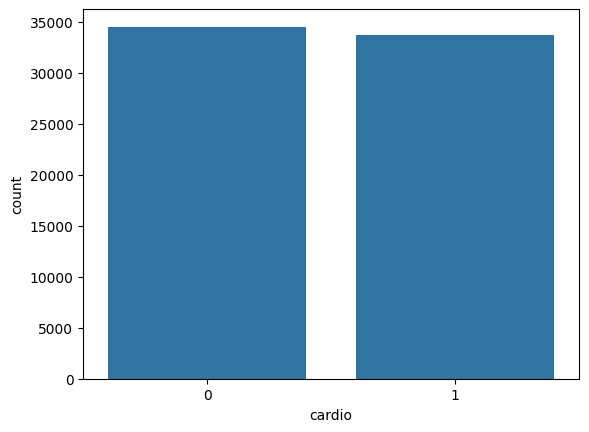

In [155]:
sns.countplot(data=df,x='cardio')


In [156]:
categorical =['gender','cholesterol','gluc','smoke','alco','active','cardio','bp_category','bp_category_encoded','bmi']
numerical =[col for col in df.columns if col not in categorical]
numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']

In [157]:
corr=df[numerical].corr()

In [158]:
corr

,height,weight,ap_hi,ap_lo,age_years
height,1.000000,0.292679,0.018544,0.035550,-0.081974
weight,0.292679,1.000000,0.268289,0.250184,0.053199
ap_hi,0.018544,0.268289,1.000000,0.731812,0.211314
ap_lo,0.035550,0.250184,0.731812,1.000000,0.155777
age_years,-0.081974,0.053199,0.211314,0.155777,1.000000


<Axes: >

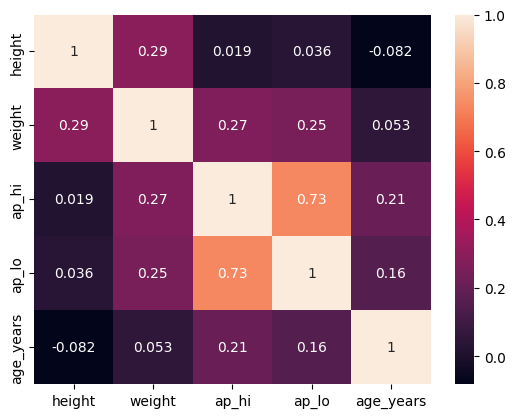

In [159]:
sns.heatmap(corr,annot=True)

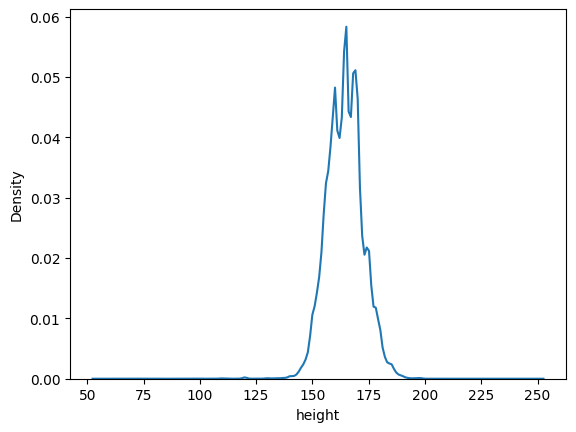

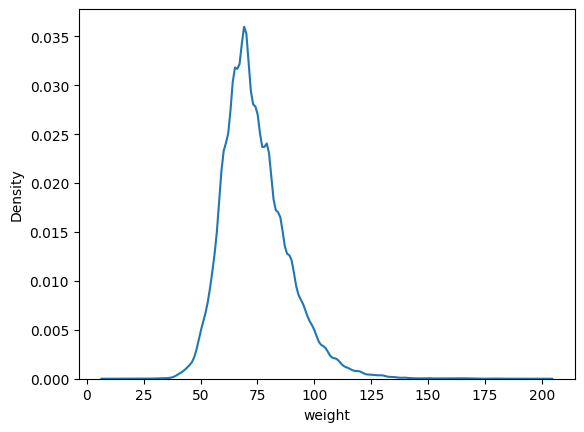

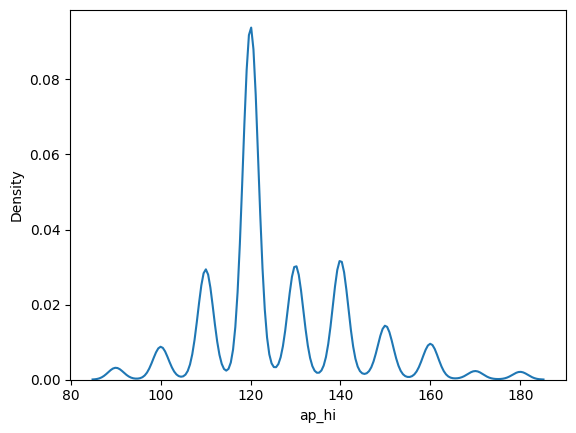

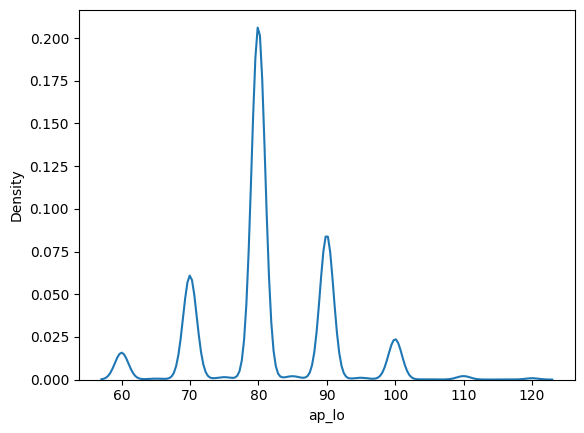

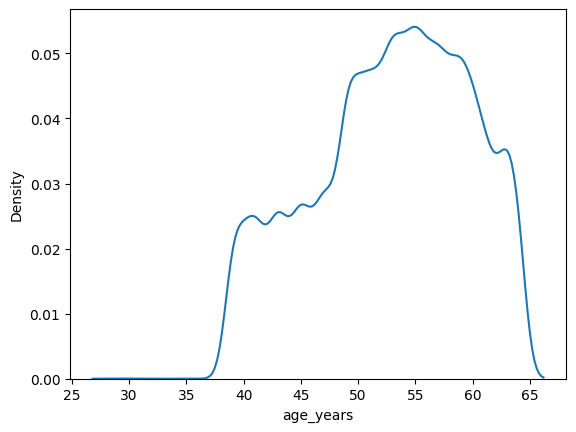

In [160]:
for col in numerical:
    plt.figure()
    sns.kdeplot(df[col])
    

In [161]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


Coloumns And Outliers

In [162]:
numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']

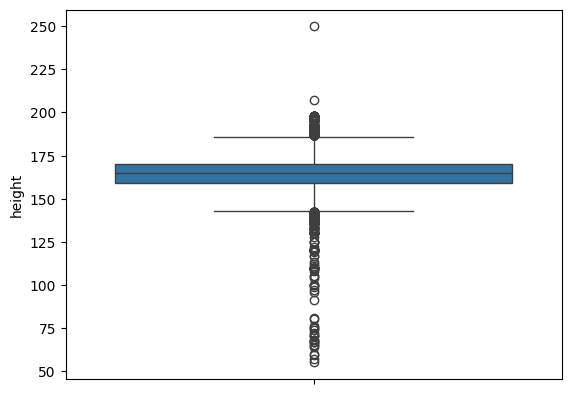

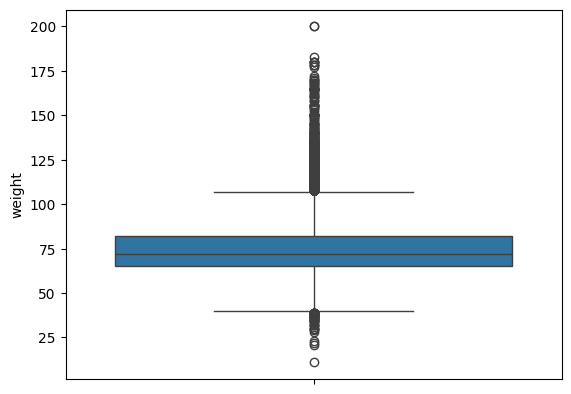

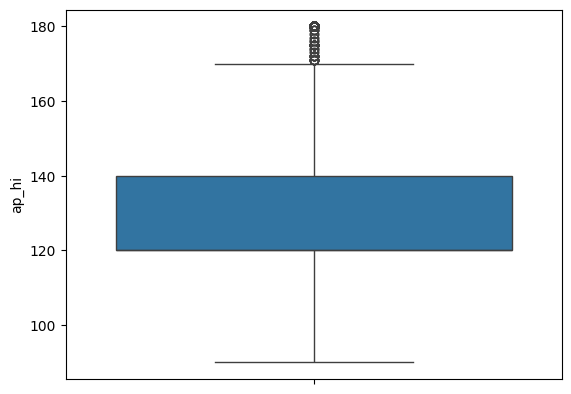

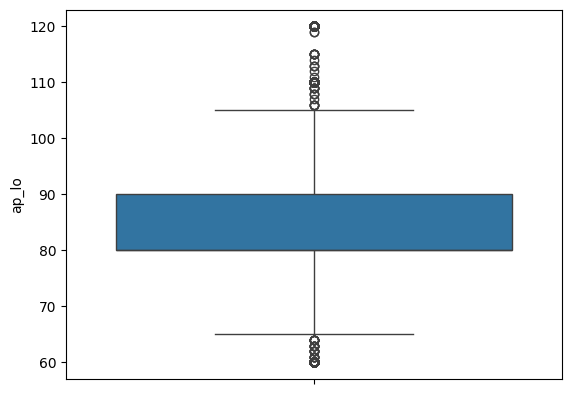

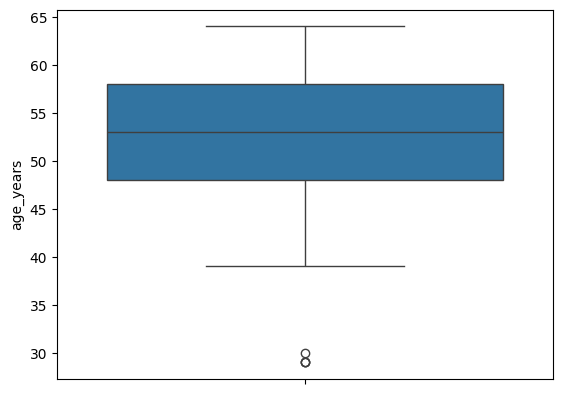

In [163]:
for col in numerical:
    plt.figure()
    sns.boxplot(df[col])
    

<Axes: ylabel='height'>

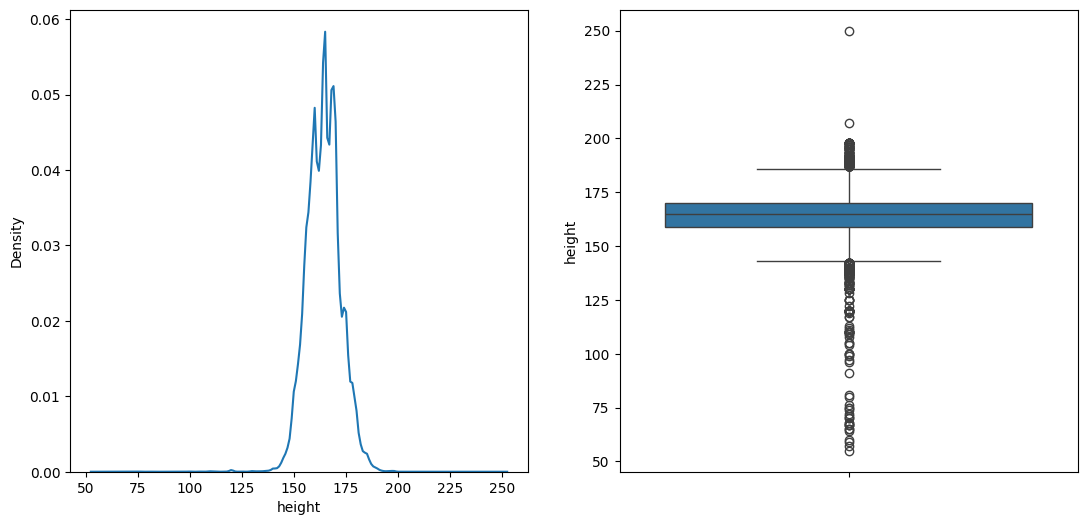

In [164]:
fig,axs =plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(13)
sns.kdeplot(df["height"],ax=axs[0])
sns.boxplot(df["height"],ax=axs[1])

IQR , Boundary Value, pciles , Yeo-Johnson 

In [165]:
df.drop(df.columns[-3],axis=1,inplace=True)

In [166]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bp_category,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,Hypertension Stage 1,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,Hypertension Stage 2,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,Hypertension Stage 1,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,Hypertension Stage 2,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,Normal,Normal


In [167]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [168]:
df.drop('bp_category_encoded',axis=1,inplace=True)

In [169]:
x = df.drop('cardio',axis=1)
y=df['cardio']


In [170]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [171]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,Normal


In [172]:
X_train , X_test,y_train,y_test = train_test_split(x,y,train_size=0.75)

In [173]:
X_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bp_category
19658,2,177,92.0,170,110,1,1,0,0,1,63,Hypertension Stage 2
51022,1,157,57.0,100,70,1,1,0,0,1,42,Normal
10165,1,165,68.0,120,80,1,1,0,0,1,46,Hypertension Stage 1
46168,2,163,85.0,160,100,3,3,1,0,1,49,Hypertension Stage 2
3214,1,150,70.0,130,70,2,1,0,0,1,54,Hypertension Stage 1


In [174]:
ct = ColumnTransformer(transformers=[('robsc',RobustScaler(),numerical),
                                      
                                      ('ohe', OneHotEncoder(drop='first',handle_unknown='ignore'),['bp_category'])],
                        remainder='passthrough')

In [175]:
X_train_transformerd = ct.fit_transform(X_train)

In [176]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__age_years', 'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gender', 'remainder__cholesterol', 'remainder__gluc',
       'remainder__smoke', 'remainder__alco', 'remainder__active'],
      dtype=object)

In [177]:
pd.DataFrame(data = X_train_transformerd,columns=ct.get_feature_names_out())

,robsc__height,robsc__weight,robsc__ap_hi,robsc__ap_lo,robsc__age_years,ohe__bp_category_Hypertension Stage 1,ohe__bp_category_Hypertension Stage 2,ohe__bp_category_Normal,remainder__gender,remainder__cholesterol,remainder__gluc,remainder__smoke,remainder__alco,remainder__active
0,1.090909,1.176471,2.5,3.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0
1,-0.727273,-0.882353,-1.0,-1.0,-1.1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0.000000,-0.235294,0.0,0.0,-0.7,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,-0.181818,0.764706,2.0,2.0,-0.4,0.0,1.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0
4,-1.363636,-0.117647,0.5,-1.0,0.1,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51148,0.090909,-0.294118,-0.5,-1.0,-0.9,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
51149,-0.090909,-0.117647,0.0,-1.0,0.6,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0
51150,-0.545455,-1.882353,-1.0,-2.0,-1.2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
51151,-0.727273,0.588235,0.0,0.0,0.1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [178]:
X_test_transformerd=ct.transform(X_test)

In [179]:
X_train_transformerd

array([[ 1.09090909,  1.17647059,  2.5       , ...,  0.        ,
         0.        ,  1.        ],
       [-0.72727273, -0.88235294, -1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.23529412,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.54545455, -1.88235294, -1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.72727273,  0.58823529,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.27272727,  0.17647059,  0.        , ...,  1.        ,
         1.        ,  1.        ]])

In [180]:
y_train

19658    1
51022    0
10165    0
46168    1
3214     0
        ..
33029    0
27810    0
45136    0
36994    0
58618    1
Name: cardio, Length: 51153, dtype: int64

In [181]:
X_train_transformerd.shape

(51153, 14)

In [182]:
X_test.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bp_category'],
      dtype='object')

In [183]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__age_years', 'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gender', 'remainder__cholesterol', 'remainder__gluc',
       'remainder__smoke', 'remainder__alco', 'remainder__active'],
      dtype=object)

Training The Model
* Decision Tree Classifier
* Random Forest
* XGB Boost

Decision Tree

In [184]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


from sklearn.tree import Dec

In [185]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_transformerd,y_train)
pred = dtc.predict(X_test_transformerd)

In [186]:
pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [187]:
accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)
cm = confusion_matrix(y_test,pred)

In [188]:
print(accuracy)
print(recall)

0.6331808585503167
0.6191790686509842


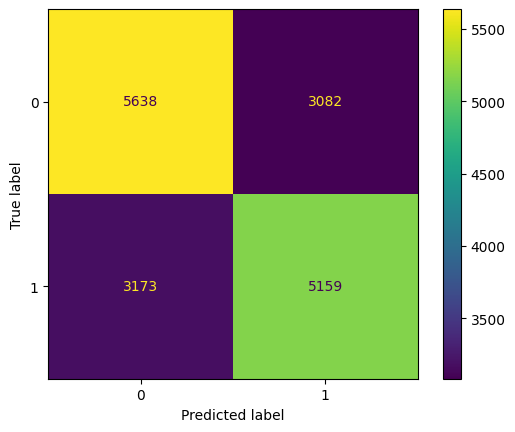

In [189]:
ConfusionMatrixDisplay(cm).plot()

In [190]:
dtc2 = DecisionTreeClassifier(max_depth=5,criterion='entropy')
dtc2.fit(X_train_transformerd,y_train)
pred = dtc2.predict(X_test_transformerd)
accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)
cm = confusion_matrix(y_test,pred)

In [191]:
print(accuracy)
print(recall)

0.7379779498006099
0.6790686509841575


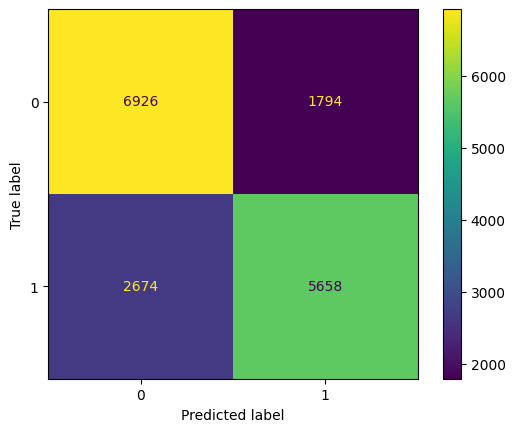

In [192]:
ConfusionMatrixDisplay(cm).plot()

HyperTuning Decision Tree

In [193]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [194]:
param_dict = {
                'criterion': ['gini','entropy'],
                'max_depth': [5,6,7],
                'max_features': [7,8,9,10,12,15],

                'min_samples_split': [8,10,12],
 
                 }
randommcv = RandomizedSearchCV(dtc,param_distributions=param_dict)
randommcv.fit(X_train_transformerd,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7],
                                        'max_features': [7, 8, 9, 10, 12, 15],
                                        'min_samples_split': [8, 10, 12]})

In [195]:
cv_pred =randommcv.predict(X_test_transformerd)

In [196]:
cv_rec = recall_score(cv_pred,y_test)
print(cv_rec)

0.7420849420849421


In [197]:
randommcv.best_params_

{'min_samples_split': 10,
 'max_features': 15,
 'max_depth': 6,
 'criterion': 'gini'}

In [198]:
best_dtc = randommcv.best_estimator_

In [199]:
best_dtc.fit(X_train_transformerd,y_train)
best_pred = best_dtc.predict(X_test_transformerd)
acc= accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.7379779498006099
0.6790686509841575


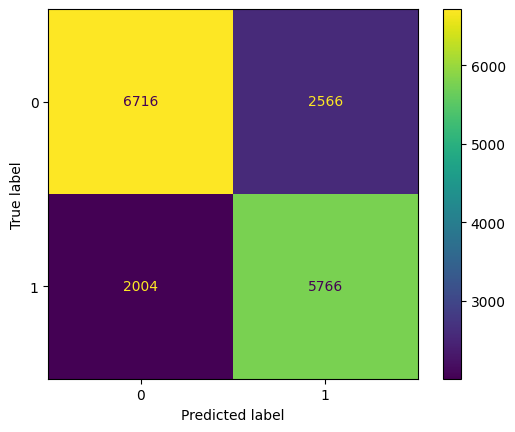

In [200]:
print(accuracy)
print(recall)
ConfusionMatrixDisplay(cm).plot()

In [201]:
best_dtc

DecisionTreeClassifier(max_depth=6, max_features=15, min_samples_split=10)

In [202]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bp_category'],
      dtype='object')

In [203]:
gender = int(input('M/F').lower())

height = int(input('heigh in cms'))

weight = int(input('Weight in kg'))

ap_hi = int(input('Ap_hi'))

ap_lo = int(input('ap_lo'))

cholestrol = int(input('Normal, Above Normal, Well Above Norma ').lower())
gluc = int(input('Normal, Above Normal, Well Above Normal').lower())

smoke = int(input('Smoker or Non-smoker').lower())

alco = int(input('Alco : Yes/No').lower())

active = int(input('Active : yes/no').lower())

age = int(input("Enter the Age"))

bmi = float(input('bmi'))

bp_car = input('bp Category: "normal", "Elevated","Hypertension Stage 1", "Hypertension Stage 2","hypertension Stage 3"')
 #if gender == 'm':
  #  gen=2
#else:
 #   gen = 1

#Chloestrol
#if cholestrol = 'nomral':



In [204]:
user_input=[gender,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,active,age,bmi]
user_input_cat =[bp_car]

In [205]:
arrayinputs_num = np.array(user_input).reshape(1,-1)
arrayinputs_car =  np.array(user_input_cat).reshape(1,-1)

In [206]:
ct = ColumnTransformer(transformers=[('robsc',RobustScaler(),arrayinputs_num),
                                      
                                      ('ohe', OneHotEncoder(drop='first',handle_unknown='ignore'),arrayinputs_car)],
                        remainder='passthrough')

In [207]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [208]:
rfc.fit(X_train_transformerd,y_train)
pred = rfc.predict(X_test_transformerd)

accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

0.7054890921885996
0.6957513202112338


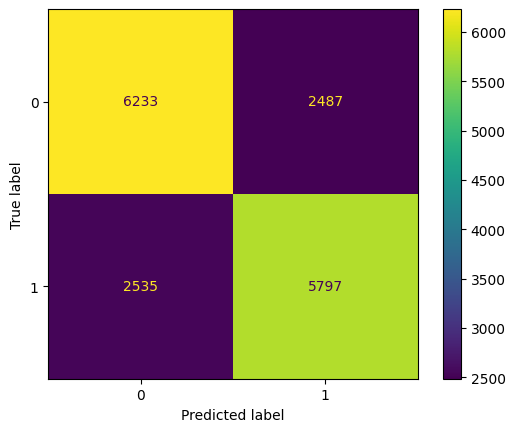

In [209]:
print(accuracy)
print(recall)
ConfusionMatrixDisplay(cm).plot()

In [210]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [211]:
params = {
 'criterion': ['gini','entropy'],
 'max_depth': [5,7,9,10,12,13],
 'min_sample_split': [5,7,8,10,12,15],
 'n_estimators': [50,100,120,150,170,200],}


In [212]:
randommcv = RandomizedSearchCV(param_distributions=param_dict,estimator = rfc)
randommcv.fit(X_train_transformerd,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7],
                                        'max_features': [7, 8, 9, 10, 12, 15],
                                        'min_samples_split': [8, 10, 12]})

In [213]:
cv_pred =randommcv.predict(X_test_transformerd)
cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

0.7372155758855267


In [214]:
randommcv.best_params_

{'min_samples_split': 12,
 'max_features': 7,
 'max_depth': 7,
 'criterion': 'gini'}

In [215]:
best_rfc =randommcv.best_estimator_

In [216]:

best_rfc.fit(X_train_transformerd,y_train)
best_pred=best_rfc.predict(X_test_transformerd)
acc= accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.7383298146844944
0.7503234152652005


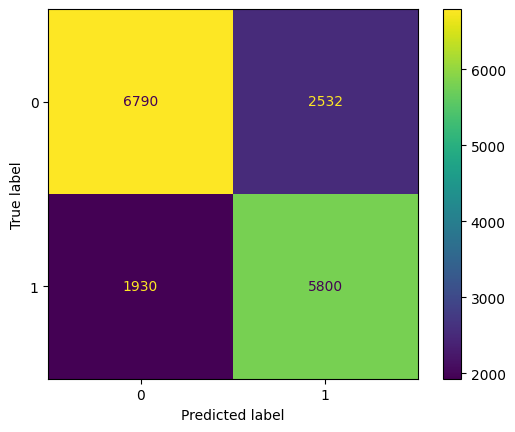

In [217]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [218]:
best_rfc

RandomForestClassifier(max_depth=7, max_features=7, min_samples_split=12)

In [219]:
from xgboost import XGBRFClassifier

In [220]:
xgb = XGBRFClassifier()

xgb.fit(X_train_transformerd,y_train)
pred=xgb.predict(X_test_transformerd)
acc= accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.7383298146844944
0.7503234152652005


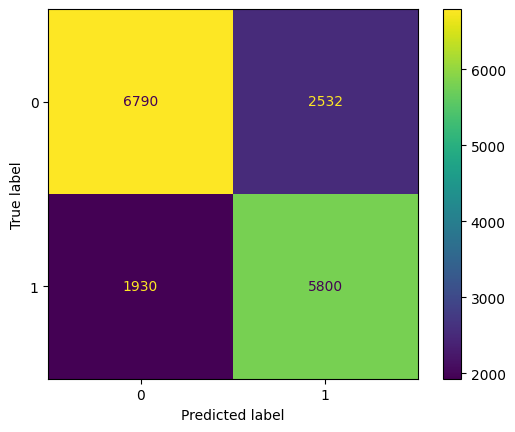

In [221]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [222]:
xgb.get_params()

{'colsample_bynode': 0.8,
 'learning_rate': 1.0,
 'reg_lambda': 1e-05,
 'subsample': 0.8,
 'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [223]:
params = {'objective': ['binary:logistic'],
 'max_depth':[5,7,9,10,12,13],
 'gamma':[0.1,0.2,0.5,0.6],
 'learning_rate': [0.01,0.001,0.1],

 'n_estimators':[50,80,100,110,120,150,160,170]
}

In [224]:
randommcv = RandomizedSearchCV(param_distributions=param_dict,estimator = xgb)
randommcv.fit(X_train_transformerd,y_train)

c:\Users\harsh\anaconda3\envs\MachineL\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "max_features", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\harsh\anaconda3\envs\MachineL\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "max_features", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\harsh\anaconda3\envs\MachineL\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "m

c:\Users\harsh\anaconda3\envs\MachineL\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "max_features", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\harsh\anaconda3\envs\MachineL\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "max_features", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\harsh\anaconda3\envs\MachineL\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "m

RandomizedSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=None,
                                             ma...
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             objective='binary:logistic',
                                             random_state=None, reg_alpha=None, ...),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7],
                                        'max_features': [7, 8, 9, 10, 12, 15],
                                        'min_samples_split': [8, 10, 12]})

In [226]:
best_xgb =randommcv.best_estimator_

best_xgb.fit(X_train_transformerd,y_train)
best_pred=best_rfc.predict(X_test_transformerd)
acc= accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

c:\Users\harsh\anaconda3\envs\MachineL\lib\site-packages\xgboost\core.py:160: UserWarning: [22:30:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "max_features", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [227]:
best_xgb

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                criterion='entropy', device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=6, max_features=7,
                max_leaves=None, min_child_weight=None, min_samples_split=8,
                missing=nan, monotone_constraints=None, multi_strategy=None,
                n_estimators=None, n_jobs=None, num_parallel_tree=None, ...)

In [228]:
import pickle
pickle.dump(best_xgb,open('xgb_classifier.pkl','wb'))